In [43]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


In [44]:
#load data
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [45]:
#see data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [47]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [48]:
#checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [49]:
#converting categorical to numerical
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['smoking_history']=encoder.fit_transform(df['smoking_history'])
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [51]:
# separating the feature and target
X = df[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']]
y = df['diabetes']



In [52]:
#splitting test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [54]:
#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9587

Confusion Matrix:
 [[18127   165]
 [  661  1047]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



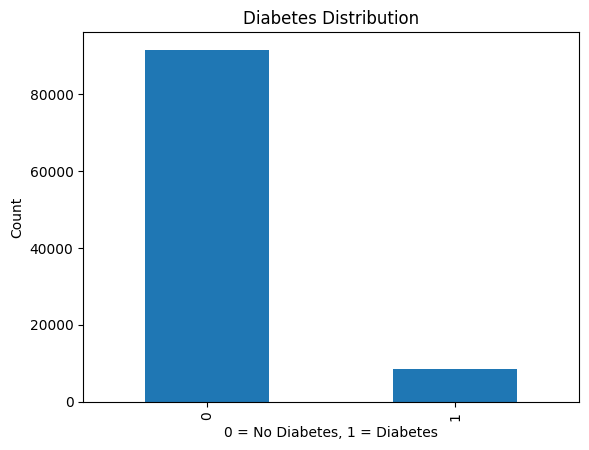

In [55]:
#VISUALIZATION 1: DIABETES DISTRIBUTION
plt.figure()
df["diabetes"].value_counts().plot(kind="bar")
plt.title("Diabetes Distribution")
plt.xlabel("0 = No Diabetes, 1 = Diabetes")
plt.ylabel("Count")
plt.show()

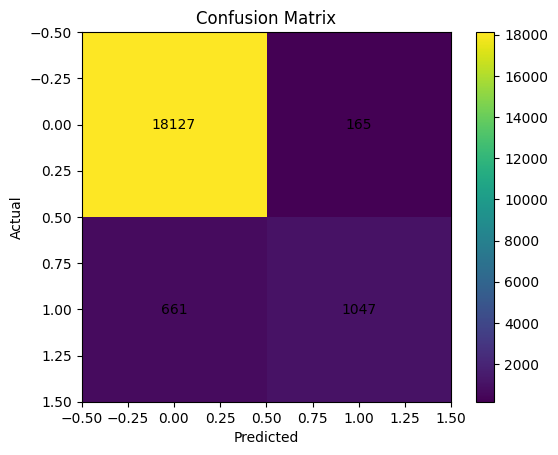

In [56]:
# VISUALIZATION 2: CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

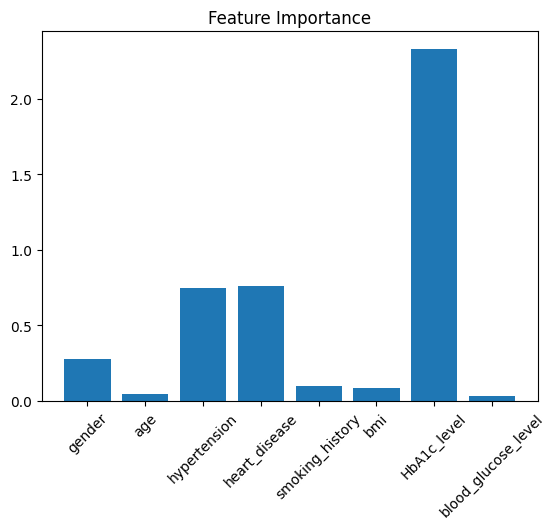

In [57]:
# VISUALIZATION 3: FEATURE IMPORTANCE
plt.figure()
plt.bar(X.columns, model.coef_[0])
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

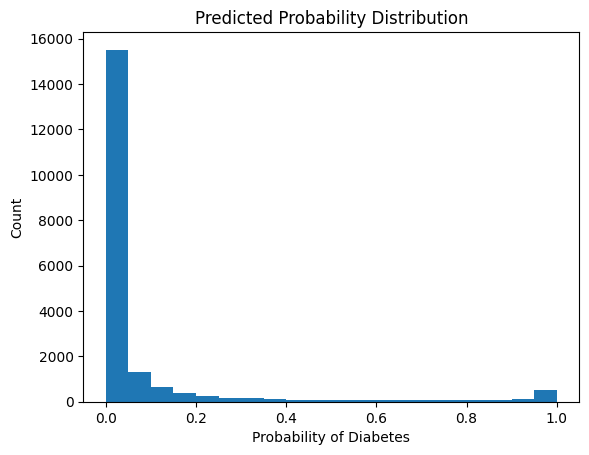

In [58]:
# VISUALIZATION 4: PROBABILITY DISTRIBUTION
plt.figure()
plt.hist(y_prob, bins=20)
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Diabetes")
plt.ylabel("Count")
plt.show()

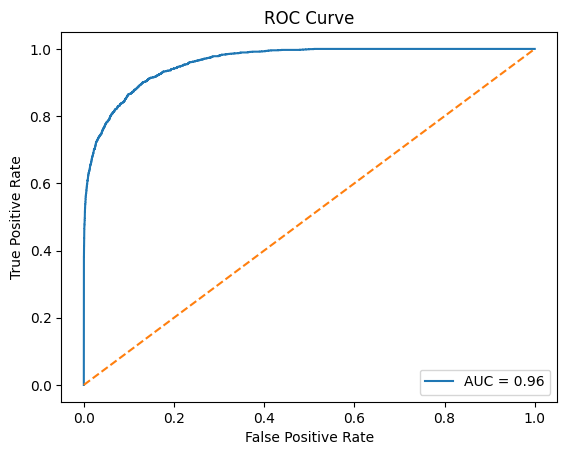

In [59]:
# VISUALIZATION 5: ROC CURVE
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 2)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [60]:
 #Risk level
if y_prob[0] >= 0.8:
    risk = "High Risk"
elif y_prob[0] >= 0.5:
    risk = "Medium Risk"
else:
    risk = "Low Risk"

In [63]:

columns = X_train.columns
new_patient = pd.DataFrame([[
    45, 1, 0, 0, 2, 27.5, 6.1, 140
]], columns=columns)

prediction = model.predict(new_patient)
probility= model.predict_proba(new_patient)[:, 1]


# Print result
if prediction[0] == 1:
    print(f"New Patient: Diabetes Detected | Probability: {probility[0]*100:.2f}% | Risk Level: {risk}")
else:
    print(f"New Patient: No Diabetes | Probability: {probility[0]*100:.2f}% | Risk Level: {risk}")

New Patient: Diabetes Detected | Probability: 99.85% | Risk Level: Low Risk
